# Loan Data Cleaning 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('loan.csv')

In [ ]:
df.head(3)

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

### % of missing values for each column

In [ ]:
(df.isnull().sum()/df.shape[0])*100

### Total % of missing values

In [ ]:
(df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100

### Heatmap showcasing no. of missing values in each column


In [ ]:
sns.heatmap(df.isnull())
plt.show()

In [ ]:
df.info()

In [ ]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [ ]:
df['Gender'].isnull().sum()

### Filling all columns with categorical data with fillna mode filling

In [ ]:
for i in df.select_dtypes(include=object).columns:
    df[i] = df[i].fillna(df[i].mode()[0])

In [ ]:
df.select_dtypes(include=object).isnull().sum()

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

### Filling all columns with numerical data with sklearn imputation

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
si = SimpleImputer(strategy='mean')
imputed_arr = si.fit_transform(df[numerical_columns])
imputed_arr

In [ ]:
new_df = pd.DataFrame(imputed_arr,columns=numerical_columns)

In [ ]:
new_df.isnull().sum()

In [ ]:
df[numerical_columns]= new_df         #writing filled columns onto original dataframe
df.isnull().sum()

### One Hot Encoding Nominal Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()

In [ ]:
arr_enc = ohe.fit_transform(df[['Gender','Married','Education','Self_Employed','Loan_Status']]).toarray()

In [ ]:
df_enc = pd.DataFrame(arr_enc,columns=['Gender_Female','Gender_Male','Married_No','Married_Yes','Graduate_Yes','Graduate_No','Self_Employed_No','Self_Employed_Yes','Loan_Status_No','Loan_Status_Yes'])

In [ ]:
df_enc.drop(['Gender_Female','Married_No','Graduate_No','Self_Employed_No','Loan_Status_No'], axis=1,inplace=True)
df.drop(['Gender','Married','Education','Self_Employed','Loan_Status'],axis=1,inplace=True)

In [ ]:
df = pd.concat([df,df_enc],axis=1)

### Ordinal Encoding Ordinal Data

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
location= [['Urban', 'Semiurban','Rural']]

In [ ]:
oe = OrdinalEncoder(categories=location)

In [ ]:
df['Property_Area'] = oe.fit_transform(df[['Property_Area']])

### Outlier Detection With Boxplot

In [ ]:
sns.boxplot(x= 'ApplicantIncome', data = df)
plt.show()

In [ ]:
sns.boxplot(x='CoapplicantIncome', data = df )
plt.show()

In [ ]:
sns.boxplot(x = 'LoanAmount', data = df)
plt.show()

In [ ]:
df

### Outlier Removal Using IQR

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
min_val =  Q1 - (1.5 * IQR)
max_val =  Q3 + (1.5 * IQR)
min_val,max_val

In [ ]:
df = df[df['ApplicantIncome'] <= max_val]

In [ ]:
df.shape

In [ ]:
sns.boxplot(x = 'ApplicantIncome', data = df)
plt.show()

### Outlier Removal Using Direct Method

In [ ]:
df.describe()

In [ ]:
min_val = df['CoapplicantIncome'].mean() - (3 * df['CoapplicantIncome'].std())    #min = mean - 3 * s.d
max_val = df['CoapplicantIncome'].mean() + (3 * df['CoapplicantIncome'].std())    #max = mean + 3 * s.d
min_val,max_val

In [ ]:
df = df[df['CoapplicantIncome'] <= max_val]

In [ ]:
sns.boxplot(x= 'CoapplicantIncome', data=df)
plt.show()


### Outlier Removal Using Z-Score

In [ ]:
z_score = (df['LoanAmount'] - df['LoanAmount'].mean())/ df['LoanAmount'].std()       # z_score = (x - mean)/ s.d
z_score

In [ ]:
df.loc[:, 'z_score']= z_score    #setting value to new column in df

In [ ]:
df = df[df['z_score']<3]   #removing rows with z_score <3

### Standard Scaling 'CoapplicantIncome'

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
df.loc[:, 'CoapplicantIncome_ss'] = ss.fit_transform(df[['CoapplicantIncome']])

In [ ]:
df.head()

In [ ]:
# Create subplots
plt.figure(figsize=(12, 6))

# First subplot: Before scaling
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.title('Before Scaling')
sns.kdeplot(x=df['CoapplicantIncome'], color='blue')

# Second subplot: After scaling
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.title('After Scaling')
sns.kdeplot(x=df['CoapplicantIncome_ss'], color='red')

plt.show()


### Min-Max Scaling ApplicantIncome

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
ms = MinMaxScaler()

In [ ]:
df[['ApplicantIncome_ms']] = ms.fit_transform(df[['ApplicantIncome']])

<Axes: title={'center': 'After Scaling'}, xlabel='ApplicantIncome_ms', ylabel='Density'>

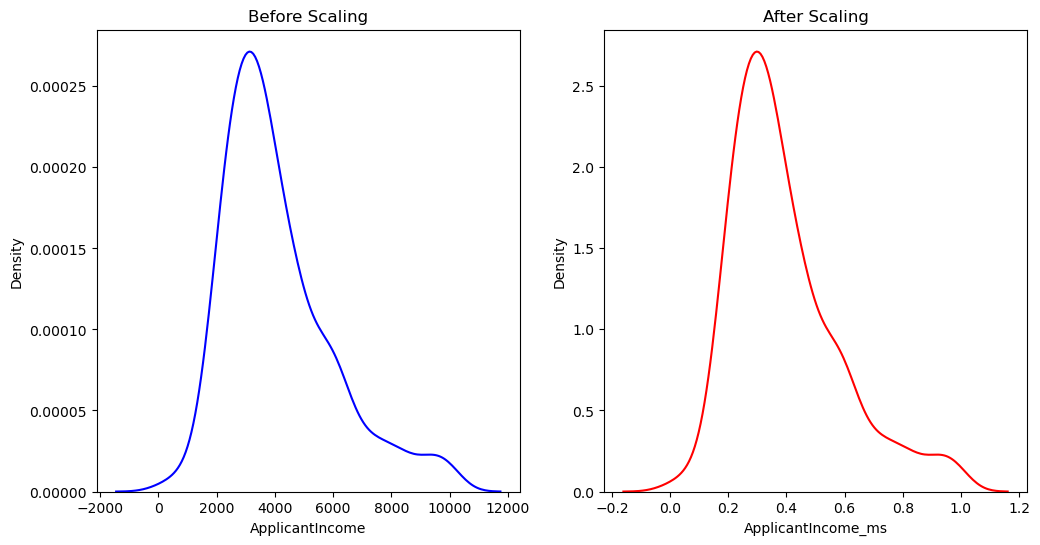

In [211]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Before Scaling')
sns.kdeplot(x=df['ApplicantIncome'], color='blue')

plt.subplot(1,2,2)
plt.title('After Scaling')
sns.kdeplot(x=df['ApplicantIncome_ms'], color='red')